<a href="https://colab.research.google.com/github/pelinbalci/TF_Custom_Models/blob/main/Quadratic_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quadratic Layer

build a custom quadratic layer which computes $y = ax^2 + bx + c$. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

import utils

# Visualize model
from tensorflow.keras.layers import Layer
from tensorflow.python.keras.utils.vis_utils import pydot
from tensorflow.python.keras.utils.vis_utils import plot_model

# Error : Function call stack:train_function
# https://github.com/tensorflow/tensorflow/issues/43174
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
class SimpleQuadratic(Layer):

    def __init__(self, units=32, activation=None):
        '''Initializes the class and sets up the internal variables'''
        # YOUR CODE HERE
        super(SimpleQuadratic, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)
    
    def build(self, input_shape):
        '''Create the state of the layer (weights)'''
        # a and b should be initialized with random normal, c (or the bias) with zeros.
        # remember to set these as trainable.
        # YOUR CODE HERE
        a_init = tf.random_normal_initializer()
        self.a = tf.Variable(name='kernel',
                            initial_value=a_init(shape=(input_shape[-1], 
                                                        self.units), 
                                                 dtype='float32'),
                            trainable=True)
        
        b_init = tf.random_normal_initializer()
        self.b = tf.Variable(name='kernel',
                            initial_value=b_init(shape=(input_shape[-1], 
                                                        self.units), 
                                                 dtype='float32'),
                            trainable=True)
        
        c_init = tf.zeros_initializer()
        self.c = tf.Variable(name='bias',
                            initial_value=c_init(shape=(self.units,), 
                                                 dtype='float32'),
                            trainable=True)
   
    def call(self, inputs):
        '''Defines the computation from inputs to outputs'''
        # Remember to use self.activation() to get the final output
        # YOUR CODE HERE
        x_squared = tf.math.square(inputs)
        x_squared_times_a = tf.matmul(x_squared, self.a)
        x_times_b = tf.matmul(inputs, self.b)
        x2a_plus_xb_plus_c = x_squared_times_a + x_times_b + self.c
        return self.activation(x2a_plus_xb_plus_c)

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  SimpleQuadratic(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

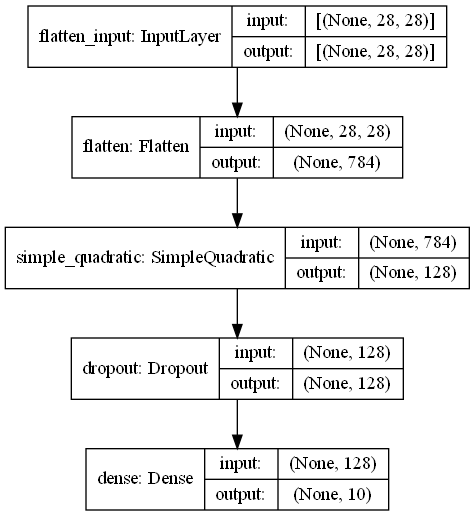

In [ ]:
model._layers = [layer for layer in model._layers if isinstance (layer, Layer)]
plot_model(model, show_shapes = True, show_layer_names = True)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4405 - accuracy: 0.8655
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1401 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1025 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0816 - accuracy: 0.9743
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.9784


[0.0742969661951065, 0.9783999919891357]